In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [61]:
target = 1 # By defaul X->Y
nb_samples = 75

Nx = {
    'name': 'exp',
    'var': 7
}

Ny = {
    'name': 'normal',
    'var': 10
}


f = lambda x: np.tanh(x) + np.sin(x) + x**3

In [62]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y

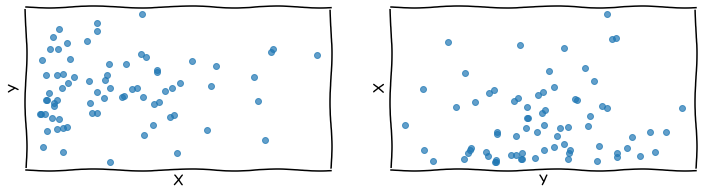

In [63]:
with plt.xkcd():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    axes[0].scatter(x, y, alpha=.7)
    axes[1].scatter(y, x, alpha=.7)
    
#     axes[0].set_title('X -> Y')
#     axes[1].set_title('Y -> X')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    
    axes[1].set_xlabel('Y')
    axes[1].set_ylabel('X')
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set
    
    plt.savefig('bivariate_causal_example')

# with plt.xkcd():
    
    plt.xticks([])
    plt.yticks([])

In [64]:
# metric_name = 'mmd_median_heuristic'
# metric_name = 'mmd'
metric_name = 'l1'

In [65]:
X_, Y_, _ = intest.partition_data(x, y)

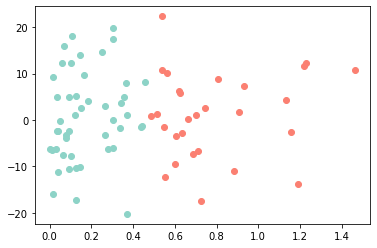

In [66]:
viz.plot_scatters(X_, Y_)

In [67]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y)
score, pairs = intest.find_max_discrp(residuals, metric_name=metric_name)

In [68]:
score

0.3206686930091185

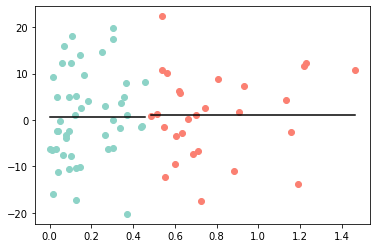

In [69]:
viz.plot_models(X_, Y_, models)

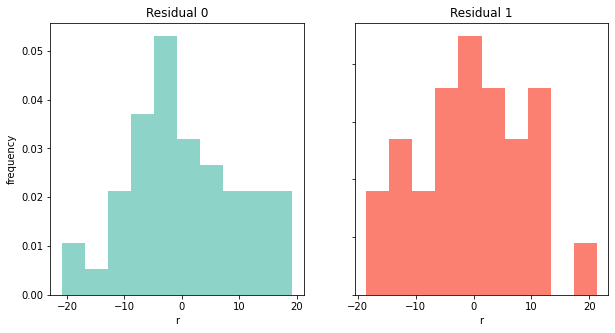

In [70]:
viz.plot_residuals(residuals)

In [71]:
X_r, Y_r, _ = intest.partition_data(y, x)

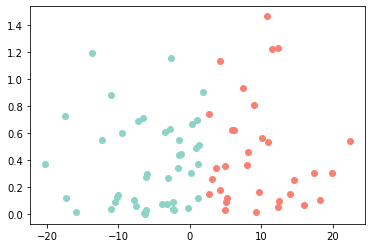

In [72]:
viz.plot_scatters(X_r, Y_r)

In [73]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x)
scorer, pairsr = intest.find_max_discrp(residualsr, metric_name=metric_name)

In [74]:
scorer

0.4142441860465117

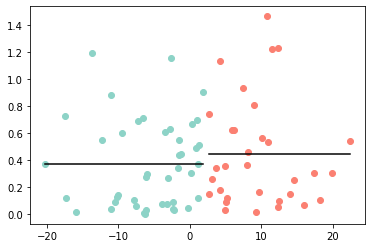

In [75]:
viz.plot_models(Y_r, X_r, modelsr)

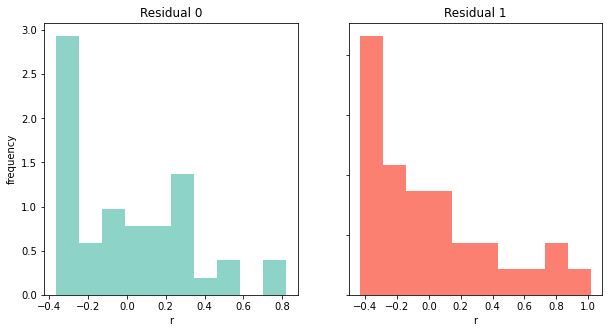

In [76]:
viz.plot_residuals(residualsr)

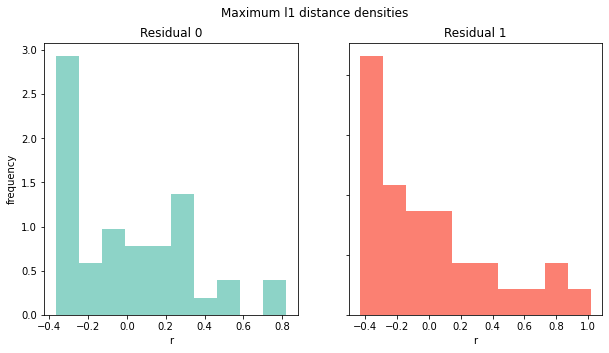

In [77]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities')

In [78]:
print('X -> Y', score)

X -> Y 0.3206686930091185


In [79]:
print('X <- Y', scorer)

X <- Y 0.4142441860465117


In [80]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [81]:
print('predicted:', int(score < scorer))

predicted: 1


In [82]:
print('Truth:', target)

Truth: 1
